In [ ]:
import os 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import dlib 
####
image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/npc2.png' 
img_bgr = cv2.imread(image_path)
####
img_show = img_bgr.copy()
####
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
####
detector = dlib.get_frontal_face_detector()
dlib_rects = detector(img_rgb, 1)
####
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽
#
    cv2.rectangle(img_show_rgb,  # img_show
                  pt1 = (l,t), pt2 = (r,b), 
                  color = (255, 255, 255), 
                  thickness = 3, 
                  lineType=cv2.LINE_AA)
####
landmark_predictor = dlib.shape_predictor(os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
#
list_landmarks = []
#
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보
    list_points = list(map(lambda L: (L.x, L.y), points.parts())) # 각각의 landmark 위치정보를 (x,y) 형태로 변환
    list_landmarks.append(list_points)
####
for landmark in list_landmarks: # double list -> a list
    for point in landmark: # a list -> tuple
        cv2.circle(img_show_rgb, point, 3, (255, 255, 255), -1)
####
x = landmark[30][0] # 이미지에서 코 부위의 x값
y = landmark[30][1] # - dlib_rect.height() // 2 
w = h = dlib_rect.height()
####
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path) # -1 해서 문제였나
img_sticker = cv2.resize(img_sticker, (w, h))
####
refined_x = x - (w // 2)
refined_y = y - (h // 2)
####
height, width = img_sticker.shape[:2]
####
M = cv2.getRotationMatrix2D(center = (width/2.0, height/2.0), #회전 중심
                            angle = -20, # 회전각도(양수 반시계방향, 음수 시계방향)
                            scale = 1) # 이미지 배율
img_sticker_rotation = cv2.warpAffine(img_sticker, M, (width, height))
####
if refined_y < 0: 
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0
####
sticker_area = img_rgb[refined_y : refined_y + img_sticker_rotation.shape[0], 
                            refined_x : refined_x + img_sticker_rotation.shape[1]]

img_rgb[refined_y : refined_y + img_sticker_rotation.shape[0], 
        refined_x : refined_x + img_sticker_rotation.shape[1]] = \
    cv2.addWeighted(sticker_area, alpha = 0.9, 
                    np.where(img_sticker_rotation==255, sticker_area, img_sticker_rotation).astype(np.uint8),
                    beta = 0.1, 0)
plt.imshow(img_rgb);

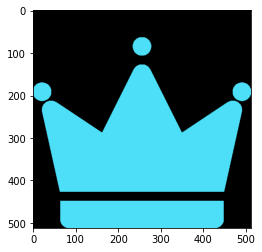

In [11]:
king_sticker = cv2.imread(os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png')

plt.imshow(king_sticker)

https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html

`cv2.imread`(fileName, flag)
- fileName (str) – 이미지파일의 경로
- flag (int) – 이미지 파일을 읽을 때의 Option.

`cv2.IMREAD_COLOR` >>> flag = 1   
이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값

`cv2.IMREAD_GRAYSCALE` >>> flag = 0  
이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용

`cv2.IMREAD_UNCHANGED` >>> flag = -1  
이미지파일을 alpha channel까지 포함하여 읽어 들입니다

-----
`cv2.imread('img.png', 0)`
이미지를 Grayscale로 읽어 들이겠다

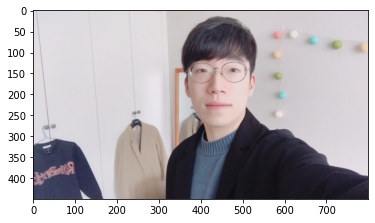

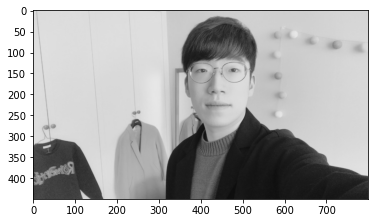

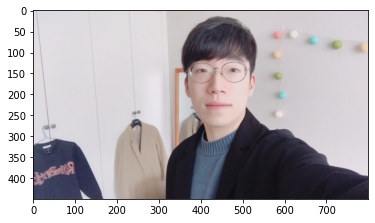

In [24]:
img_bgr = cv2.imread(my_image_path, -1)    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

img_bgr = cv2.imread(my_image_path, 0)    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

img_bgr = cv2.imread(my_image_path, 1)    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

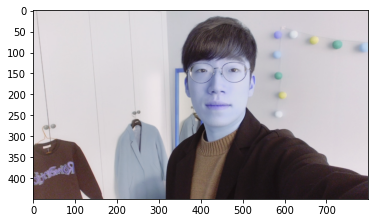

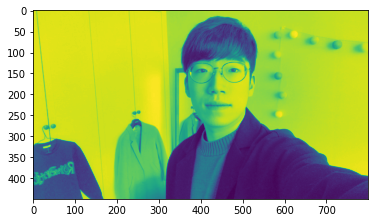

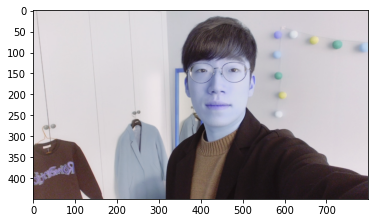

In [25]:
img_bgr = cv2.imread(my_image_path, -1)    
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr) 
plt.show()

img_bgr = cv2.imread(my_image_path, 0)    
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr) 
plt.show()

img_bgr = cv2.imread(my_image_path, 1)    
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr) 
plt.show()

# 123

# 

In [10]:
import os 
# 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 
# OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt 
# 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np 
# 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib 
# 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

In [8]:
img_bgr

array([[[224, 221, 218],
        [224, 220, 219],
        [224, 220, 219],
        ...,
        [219, 213, 217],
        [218, 212, 216],
        [218, 213, 215]],

       [[224, 220, 219],
        [224, 220, 219],
        [224, 219, 220],
        ...,
        [219, 213, 217],
        [218, 212, 216],
        [218, 212, 216]],

       [[224, 220, 219],
        [224, 219, 220],
        [224, 219, 220],
        ...,
        [219, 213, 217],
        [218, 212, 216],
        [218, 212, 216]],

       ...,

       [[ 92,  60,  59],
        [101,  70,  71],
        [ 92,  64,  66],
        ...,
        [ 46,  33,  36],
        [ 44,  29,  30],
        [ 43,  25,  28]],

       [[100,  65,  66],
        [105,  72,  74],
        [ 98,  67,  70],
        ...,
        [ 41,  28,  30],
        [ 44,  30,  30],
        [ 51,  33,  36]],

       [[114,  76,  81],
        [107,  73,  76],
        [ 98,  65,  70],
        ...,
        [ 37,  24,  25],
        [ 44,  30,  30],
        [ 60,  41,  45]]

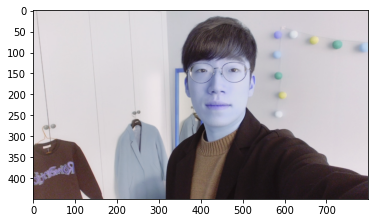

In [6]:
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/image.png' 
# 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    
# OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      
# 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) 
# 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() 
# 이미지 실제 출력

matplotlib, dlib 등의 이미지 라이브러리는  
이미지 채널을 RGB 순서  
그런데 opencv는 예외적으로 BGR 순서

In [18]:
img_bgr.shape

(450, 800, 3)

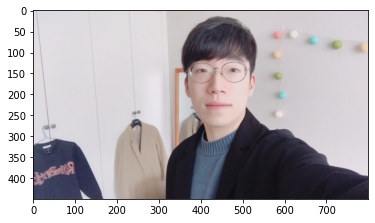

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
# 이미지 실제 출력하기 위해 이미지를 올려줌 
#(원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show()

### 2-3. 얼굴 검출 face detection
dlib의 face detector는  
HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)을 사용해서 얼굴을 찾기
`detector_hog`를 이용해서 얼굴의 bounding box를 추출합니다.

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   
                        # (image, num of image pyramid)

In [24]:
img_rgb.shape

(450, 800, 3)

In [25]:
dlib_rects

rectangles[[(345, 98) (531, 284)]]

rectangles[[(345, 98) (531, 284)]]


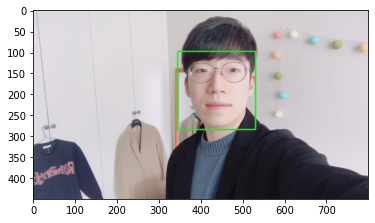

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 
    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

`landmark_predictor`  
RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환

`dlib.rectangle`  
내부를 예측하는 박스

`dlib.full_object_detection`  
각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [9]:
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [10]:
img_rgb.shape

(450, 800, 3)

In [8]:
dlib_rects

rectangles[[(345, 98) (531, 284)]]

얼굴 영역 박스 마다 face landmark를 찾아냅니다  
face landmark 좌표를 저장해둡니다

In [9]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보
    list_points = list(map(lambda L: (L.x, L.y), points.parts())) # 각각의 landmark 위치정보를 (x,y) 형태로 변환
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


map(points.parts().x points.parts().y)

In [33]:
list_landmarks

[[(368, 153),
  (368, 174),
  (371, 195),
  (376, 215),
  (382, 235),
  (391, 252),
  (404, 266),
  (420, 277),
  (441, 279),
  (461, 276),
  (480, 266),
  (495, 252),
  (508, 235),
  (516, 216),
  (520, 195),
  (523, 173),
  (524, 151),
  (377, 131),
  (386, 119),
  (399, 116),
  (413, 118),
  (425, 124),
  (454, 121),
  (466, 114),
  (481, 112),
  (494, 114),
  (503, 127),
  (439, 143),
  (438, 156),
  (438, 169),
  (437, 182),
  (423, 197),
  (431, 199),
  (438, 200),
  (446, 199),
  (454, 197),
  (391, 147),
  (399, 142),
  (409, 143),
  (416, 149),
  (408, 150),
  (399, 150),
  (464, 147),
  (472, 141),
  (482, 141),
  (489, 145),
  (482, 149),
  (473, 149),
  (411, 227),
  (421, 222),
  (432, 218),
  (439, 220),
  (446, 218),
  (458, 222),
  (471, 227),
  (458, 234),
  (446, 238),
  (438, 238),
  (431, 238),
  (420, 235),
  (415, 227),
  (432, 227),
  (439, 228),
  (447, 227),
  (466, 227),
  (446, 228),
  (438, 229),
  (431, 228)]]

`list_landmarks[0]`  
얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고  
각 원소는 68개의 랜드마크 위치가 나열된 list  
list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

`cv2.circle` OpenCV의 원을 그리는 함수
img_show 이미지 위 각각의 point에 크기가 2이고  
(0, 255, 255)색으로 내부가 채워진  
(-1) (노란)원을 그림 크기
(마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

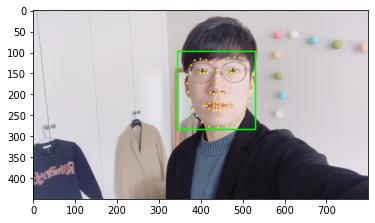

In [10]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

코 중심을 기준으로 높이 x 이상에 그려도 되고 눈썹 위 n 픽셀 위에 스티커를 구현해도

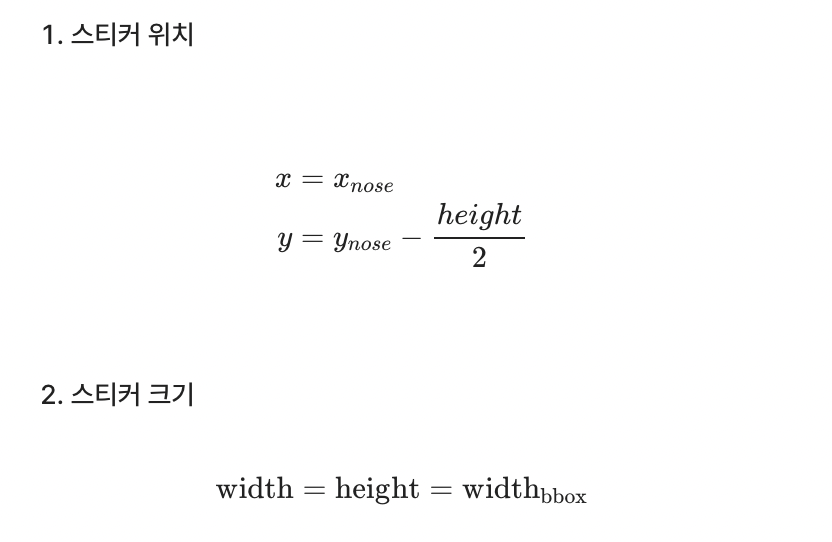

In [36]:
landmark[30]

(437, 182)

In [37]:
dlib_rect

rectangle(345,98,531,284)

In [38]:
dlib_rect.height()
# 284 - 98 +1

187

In [43]:
dlib_rect.width()
#531 - 345 + 1

187

In [11]:
# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height() // 2 
# 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수 // 2 
#→ (437, 182-((186 + 1) // 2))
    w = h = dlib_rect.width() 
# 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) 
#→ max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x, y) : ({x},{y})')
    print (f'(w, h) : ({w},{h})')

(437, 182)
(x, y) : (437,89)
(w, h) : (187,187)


In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path) # image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w, h)) # (image 행렬, w가로 h세로 ) 픽셀의 수(187)
print(img_sticker.shape) 
# 사이즈를 조정한 왕관 이미지의 차원 확인

(187, 187, 3)


원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정  
이미지 시작점은 top-left 좌표  
즉, refined_x, refined_y값에서 왕관 이미지가 시작됨  

In [13]:
refined_x = x - (w // 2) # 437 - (187//2) = 344
refined_y = y - h # 89 - 187 = -98

print (f'(x, y) : ({refined_x}, {refined_y})') 

(x, y) : (344, -98)


음수 발생 : 이미지 범위를 벗어남  
우리는 현재 이마 자리에 왕관을 두고 싶은건데,  
이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것  
opencv는 ndarray데이터를 사용하는데,  
ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

In [48]:
img_sticker.shape

(187, 187, 3)

왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함  
좌표 순서가 y, x임에 유의한다. (y, x, rgb channel)  
현재 상황에서는 -y 크기만큼 스티커를 crop 하고,  
top 의 x좌표와 y 좌표를 각각의 경우에 맞춰  
원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.  
음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.

In [14]:
if refined_x < 0: # refined_x = 344
    img_sticker = img_sticker[:, -refined_x:] # -344
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0: # refined_y = -98
    img_sticker = img_sticker[-refined_y:, :] # 98
    refined_y = 0

print (f'(x, y) : ({refined_x},{refined_y})')

(x, y) : (344,0)


In [50]:
# (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
img_sticker.shape

(89, 187, 3)

In [53]:
img_show.shape

(450, 800, 3)

#### sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
img_sticker[0] = 89  
img_sticker[1] = 187  
refined_x = 344  
refined_y = 0

> img_show[0:89, 344:531]
>> x좌표 344 ~ 531 / y좌표 0 ~ 89

왕관 이미지에서 사용할 부분은 0이 아닌 `색이 있는 부분을 사용`  
> `0`이 나오는 부분은 `흰색` --> `이미지가 없다` 

현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨  
그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용  

`sticker_area`(__스티커__ 적용할 부분 만큼 __원본 이미지__ 에서 자른 이미지)  
즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은  
원본 이미지에서 미리 잘라놓은 sticker_area를 적용하고,  
나머지 부분은 스티커로 채워주면 됨  
`np.where` 조건에 해당하는 index만 찾아서 값을 적용  
아래 코드에서는 `img_sticker`가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는   
sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,  
나머지 부분은 img_sticker(왕관 이미지)를 적용한다.  

In [15]:
sticker_area = img_show[refined_y : refined_y + img_sticker.shape[0], 
                        refined_x : refined_x + img_sticker.shape[1]]
img_show[refined_y : refined_y + img_sticker.shape[0], 
         refined_x : refined_x + img_sticker.shape[1]] = \ 
    np.where(img_sticker==0 ,sticker_area, img_sticker).astype(np.uint8)

In [19]:
img_show.shape

(450, 800, 3)

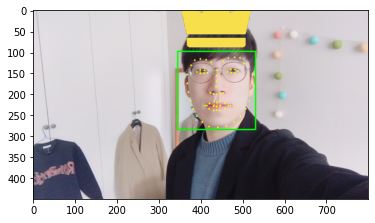

In [16]:
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
img_bgr.shape

(450, 800, 3)

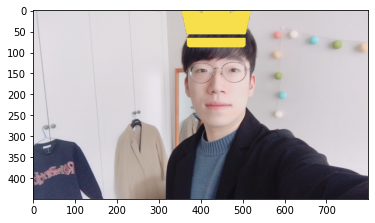

In [17]:
sticker_area = img_bgr[refined_y : refined_y + img_sticker.shape[0], 
                       refined_x : refined_x + img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y : refined_y + img_sticker.shape[0], 
        refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
# rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

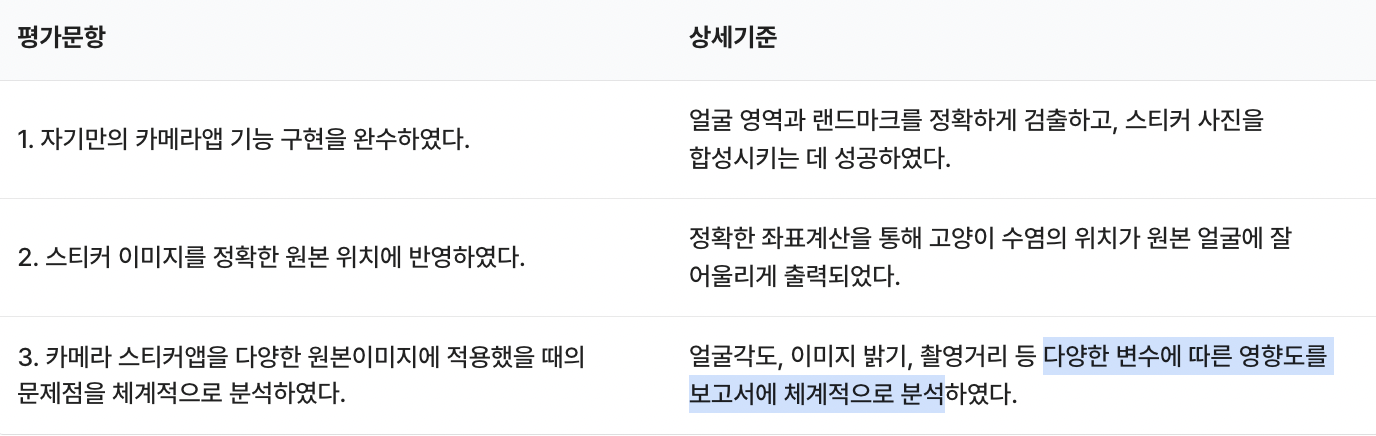

# 2-6. 프로젝트: 고양이 수염 스티커 만들기 
https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1

In [1]:
import cv2
import dlib

### Step 1. 스티커 구하기 or 만들기
(1) 고양이 수염 이미지를 다운로드   
(2) 여러분의 셀카 이미지도 촬영  

### Step 2. 얼굴 검출 & 랜드마크 검출 하기
`dlib`을 이용해서 얼굴의 `bounding box` 위치와 `landmark`의 위치를 찾아

### Step 3. 스티커 적용 위치 확인하기

### Step 4. 스티커 적용하기
`np.where`를 사용해서 스티커를 적용  
opencv 의 `cv2.addWeighted()`  

### Step 5. 문제점 찾아보기
1. 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
2. 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
3. 실행 속도가 중요할까요?
4. 스티커앱을 만들 때 정확도가 얼마나 중요할까요?